In [1]:
# Google Colab 用
import random

import cv2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import ArtistAnimation
from tqdm import tqdm

100%|████████████████████████████████████████████████████████████████████████████████| 1300/1300 [14:21<00:00,  1.51it/s]


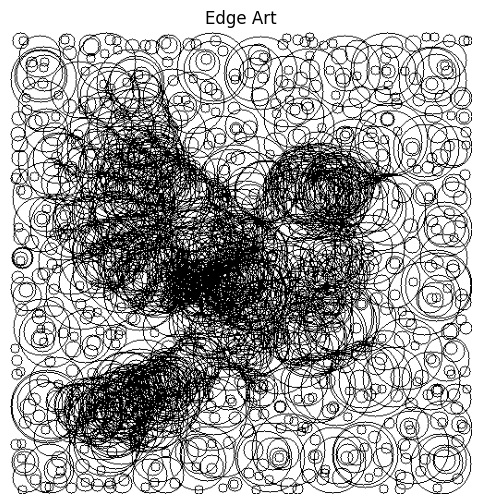

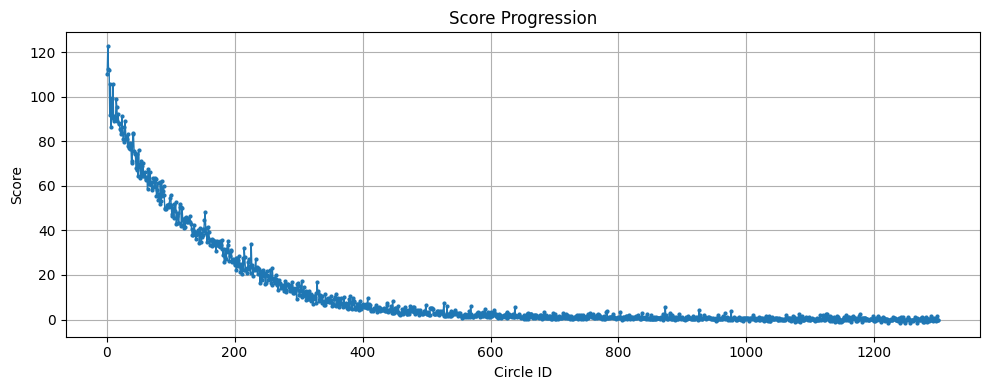

In [45]:
# 画像name
filename = "EdgeArt_sample/bird.jpg"

# パラメータ
image_size = 500  # 画像の縦横サイズ
min_circle_radius = 5  # 最低半径
max_circle_radius = 40  # 最高半径
num_iterations = 1300  # 円の数
num_candidates_per_iter = 400  # １回のテストで調べる円の数
circle_line_thickness = 1  # 円周線
white_penalty = 0.5  # 白いところへの描画を抑える度合

# 画像読み込みと前処理
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (image_size, image_size))
blurred = cv2.GaussianBlur(original, (3, 3), 0)
target = 1.0 - blurred / 255.0  # 黒=1、白=0　ぼかして白黒反転
canvas = np.zeros_like(target)

# 元画像の貢献スコアマップを事前に一度だけ計算
penalty_mask = 1 - white_penalty * (1 - target)

# 円の評価関数
def evaluate_figure(cx, cy, r):
    mask = np.zeros_like(target, dtype=np.uint8)
    cv2.circle(mask, (cx, cy), r, 1, thickness=circle_line_thickness)
    overlap = target * mask - canvas * mask
    score = np.sum(overlap * penalty_mask)
    return score, mask


# 円の記録
records_params = []
records_scores = []

# メイン処理
for _ in tqdm(range(num_iterations)):
    best_score = -np.inf
    best_params = None
    best_mask = None

    for _ in range(num_candidates_per_iter):
        r = random.randint(min_circle_radius, max_circle_radius)
        cx = random.randint(r, image_size - r)
        cy = random.randint(r, image_size - r)
        score, mask = evaluate_figure(cx, cy, r)
        if score > best_score:
            best_score = score
            best_params = (cx, cy, r)
            best_mask = mask

    if best_params:
        canvas += best_mask
        canvas = np.clip(canvas, 0, 1)
        records_params.append(best_params)
        records_scores.append(best_score)

# 結果画像表示
output_img = (1.0 - canvas) * 255
output_img = output_img.astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(output_img, cmap="gray")
plt.axis("off")
plt.title("Edge Art")
plt.show()

# 画像保存
cv2.imwrite("Edge_Art.png", output_img)
# files.download("Edge_Art.png")

# CSV保存（Circle ID, X, Y, R, Score）
df = pd.DataFrame(records_params, columns=["X", "Y", "R"])
df.insert(0, "Circle ID", range(1, len(df) + 1))
df["Score"] = records_scores
df.to_csv("circle_parameters.csv", index=False)
# files.download("circle_parameters.csv")

# スコア推移のグラフ表示
plt.figure(figsize=(10, 4))
plt.plot(
    range(1, len(records_scores) + 1),
    records_scores,
    marker="o",
    markersize=2,
    linewidth=1,
)
plt.xlabel("Circle ID")
plt.ylabel("Score")
plt.title("Score Progression")
plt.grid(True)
plt.tight_layout()
plt.show()

# 他の図形を追加

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [07:42<00:00,  5.78s/it]


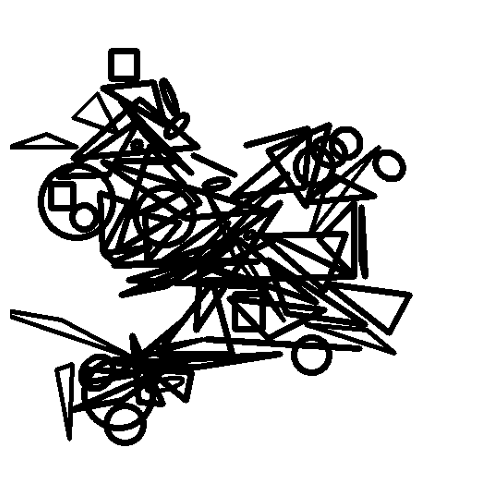

NameError: name 'animation' is not defined

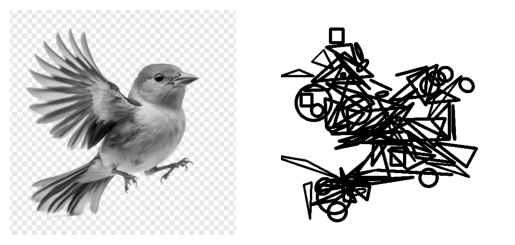

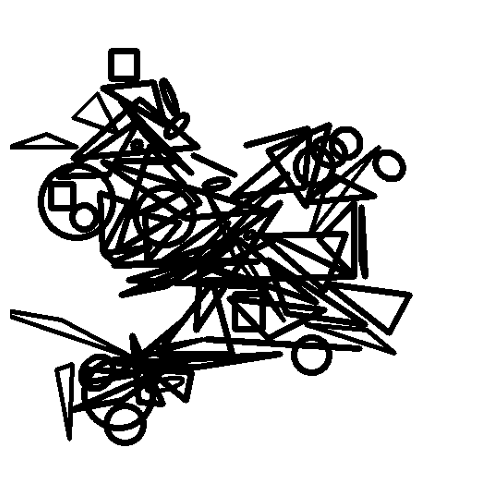

In [6]:
# 画像ファイル
filename = f"../../dataset/sample/bird.jpg"

# 一般パラメータ
image_size = 500  # 画像の縦横サイズ
figure_candidates = ["line", "circle", "ellipse", "square", "triangle"]  # 図形の選択肢
num_iterations = 80  # 図形の数（試行回数）
num_candidates_per_iter = 1500  # １回のテストで調べる図形の数
white_penalty = 0.9  # 白いところへの描画を抑える度合
score_threshold = 50  # スコア20以下は描画しない
color_candidates = [1]  # 　白か黒の色を選択
color_selected_weight = [1]
weight_line_thickness_candidates = [1, 1, 1]
weight_decay_line_thickness_candidates = [1, 0.5, 0.3]
# weight_decay_rates = [1, 0.8, 0.5, 0.3]  # 　num_iterationsごとに周線の太さを選ぶ確率を変更

# 直線パラメータ
weight_selected_line = 0.5
line_thickness_candidates = [1, 3, 5]  # 周線の太さ
min_line_length = 2  # 最低縦横サイズ
max_line_length = 100  # 最高縦横サイズ

# 円パラメータ
weight_selected_circle = 0.05
circle_line_thickness_candidates = [1, 3, 5]
min_circle_radius = 5  # 最低半径
max_circle_radius = 40  # 最高半径

# 楕円パラメータ
weight_selected_ellipse = 0.5
ellipse_line_thickness_candidates = [1, 3, 5]
min_ellipse_radius = 5  # 横方向、縦方向の最低半径
max_ellipse_radius = 40  # 横方向、縦方向の最高半径

# 四角パラメータ
weight_selected_square = 0.5
square_line_thickness_candidates = [1, 3, 5]  # 周線の太さ
min_square_size = 2  # 最低縦横サイズ
max_square_size = 40  # 最高縦横サイズ

# 三角形パラメータ
weight_selected_triangle = 0.5
triangle_line_thickness_candidates = [1, 3, 5]  # 周線の太さ
min_triangle_length = 2  # 最低縦横サイズ
max_triangle_length = 100  # 最高縦横サイズ
isClosed = True
# fill_glag =

# 描画図形を選択する確率割合
weights = [
    weight_selected_line,
    weight_selected_circle,
    weight_selected_ellipse,
    weight_selected_square,
    weight_selected_triangle,
]

# 画像読み込みと前処理
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (image_size, image_size))
blurred = cv2.GaussianBlur(original, (3, 3), 0)
target = 1.0 - blurred / 255.0  # 黒=1、白=0　ぼかして白黒反転
canvas = np.zeros_like(target)

# 元画像の貢献スコアマップを事前に一度だけ計算
penalty_mask = 1 - white_penalty * (1 - target)

# 評価関数
def evaluate_figure(mask):
    overlap = target * mask - canvas * mask
    score = np.sum(overlap * penalty_mask)
    return score

# 描画間数
def draw_figure(choiced_figure):
    params_dict = {}
    params_dict["choiced_figure"] = choiced_figure

    mask = np.zeros_like(target, dtype=np.uint8)
    # 直線の描画
    if choiced_figure == "line":
        xl = random.randint(min_line_length, max_line_length)
        yl = random.randint(min_line_length, max_line_length)
        x1 = random.randint(xl, image_size - xl)
        y1 = random.randint(yl, image_size - yl)
        x2 = random.randint(x1 - xl, x1 + xl)
        y2 = random.randint(y1 - yl, y1 + yl)
        pt1 = (x1, y1)
        pt2 = (x2, y2)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            square_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        if line_thickness == -1:
            lineType = cv2.FILLED
            line_thickness = 2
        else:
            lineType = cv2.LINE_8
        cv2.line(
            mask,
            pt1=pt1,
            pt2=pt2,
            color=color,
            thickness=line_thickness,
            lineType=lineType,
        )
        params_dict["params"] = {
            "pt1": pt1,
            "pt2": pt2,
            "color": color,
            "line_thickness": line_thickness,
            "lineType": lineType,
        }
    # 円の描画
    elif choiced_figure == "circle":
        radius = random.randint(min_circle_radius, max_circle_radius)
        x = random.randint(radius, image_size - radius)
        y = random.randint(radius, image_size - radius)
        center = (x, y)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            circle_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.circle(
            mask,
            center=center,
            radius=radius,
            color=color,
            thickness=line_thickness,
        )
        params_dict["params"] = {
            "center": center,
            "radius": radius,
            "color": color,
            "line_thickness": line_thickness,
        }
    # 楕円の描画
    elif choiced_figure == "ellipse":
        xr = random.randint(min_ellipse_radius, max_ellipse_radius)
        yr = random.randint(min_ellipse_radius, max_ellipse_radius)
        x = random.randint(xr, image_size - xr)
        y = random.randint(yr, image_size - yr)
        angle = random.randint(0, 360)
        box = ((x, y), (xr, yr), angle)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            ellipse_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.ellipse(mask, box=box, color=color, thickness=line_thickness)
        params_dict["params"] = {
            "box": box,
            "color": color,
            "line_thickness": line_thickness,
        }
    # 四角形の描画
    elif choiced_figure == "square":
        w = random.randrange(min_square_size, max_square_size, 2)
        h = random.randrange(min_square_size, max_square_size, 2)
        x = random.randint(w / 2, image_size - w / 2)
        y = random.randint(h / 2, image_size - h / 2)
        pt1 = (int(x - w / 2), int(y + h / 2))
        pt2 = (int(x + w / 2), int(y - h / 2))
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            square_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        if line_thickness == -1:
            lineType = cv2.FILLED
            line_thickness = 2
        else:
            lineType = cv2.LINE_8
        cv2.rectangle(
            mask,
            pt1=pt1,
            pt2=pt2,
            color=color,
            thickness=line_thickness,
            lineType=lineType,
        )
        params_dict["params"] = {
            "pt1": pt1,
            "pt2": pt2,
            "color": color,
            "line_thickness": line_thickness,
            "lineType": lineType,
        }
    # 三角形の描画
    elif choiced_figure == "triangle":
        possible_polt_flag = False
        while possible_polt_flag == False:
            xl = random.randint(min_triangle_length, max_triangle_length)
            yl = random.randint(min_triangle_length, max_triangle_length)
            x1 = random.randint(xl, image_size - xl)
            y1 = random.randint(yl, image_size - yl)
            x2 = random.randint(x1 - xl, x1 + xl)
            y2 = random.randint(y1 - yl, y1 + yl)
            x3 = random.randint(x2 - xl, x2 + xl)
            y3 = random.randint(y2 - yl, y2 + yl)
            if (x3 <= image_size & x3 >= 0) & (y3 <= image_size & y3 >= 0):
                possible_polt_flag = True

        pts = [np.array(((x1, y1), (x2, y2), (x3, y3)))]
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            triangle_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.polylines(
            mask,
            pts=pts,
            isClosed=isClosed,
            color=color,
            thickness=line_thickness,
        )
        params_dict["params"] = {
            "pts": pts,
            "isClosed": isClosed,
            "color": color,
            "line_thickness": line_thickness,
        }
    else:
        print("図形の選択肢に含まれていません。")

    return mask, params_dict

# 図形の記録
records_params = []
records_scores = []
records_masks = []
records_canvas = []

# メイン処理
for _ in tqdm(range(num_iterations)):
    if _ >= 50:
        weight_line_thickness_candidates = weight_decay_line_thickness_candidates
    best_score = -np.inf
    best_params = None
    best_mask = None

    for _ in range(num_candidates_per_iter):
        # 図形の確率的選択
        choiced_figure = random.choices(figure_candidates, weights=weights)[0]
        mask, params_dict = draw_figure(choiced_figure)
        score = evaluate_figure(mask)
        if score > best_score:
            best_score = score
            best_params = params_dict
            best_mask = mask

    if (best_params != None) & (best_score >= score_threshold):
        canvas += best_mask
        canvas = np.clip(canvas, 0, 1)
        records_params.append(best_params)
        records_scores.append(best_score)
        records_masks.append(best_mask)
        records_canvas.append(canvas)

# 結果画像表示
output_img = (1.0 - canvas) * 255
output_img = output_img.astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(output_img, cmap="gray")
plt.axis("off")
# plt.title("Edge Art")
plt.show()

# 画像保存
cv2.imwrite(f"../../output/sample/output_bird.png", output_img)
# files.download("Edge_Art.png")

# CSV保存
# df = pd.DataFrame(
#     records_params, columns=["FIGURE_NAME", "X", "Y", "R", "W", "H", "LINE_THICKNESS"]
# )
# df.insert(0, "FIgure ID", range(1, len(df) + 1))
# df["Score"] = records_scores
# df.to_csv("circle_parameters.csv", index=False)
# files.download("circle_parameters.csv")

# スコア推移のグラフ表示
# plt.figure(figsize=(10, 4))
# plt.plot(
#     range(1, len(records_scores) + 1),
#     records_scores,
#     marker="o",
#     markersize=2,
#     linewidth=1,
# )
# plt.xlabel("Circle ID")
# plt.ylabel("Score")
# plt.title("Score Progression")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# 比較画像の保存
target_img = (1.0 - target) * 255
target_img = target_img.astype(np.uint8)
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(target_img, cmap="gray")
a.axis("off")
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(output_img, cmap="gray")
a.axis("off")
plt.savefig(f"../../output/sample/output_compare_bird.png")

# アニメーションの保存
ims = []
fig = plt.figure(figsize=(6, 6))
for figure_id in range(0, len(records_canvas)):
    output_img = (1.0 - records_canvas[figure_id]) * 255
    output_img = output_img.astype(np.uint8)
    plt.axis("off")
    im = plt.imshow(output_img, cmap="gray")
    ims.append([im])
# アニメーション作成
ani = animation.ArtistAnimation(
    fig, ims, interval=100, blit=True, repeat_delay=3000
)
# 保存
ani.save(f"../../output/sample/output_animation_bird.gif", writer="pillow")

(-0.5, 499.5, 499.5, -0.5)

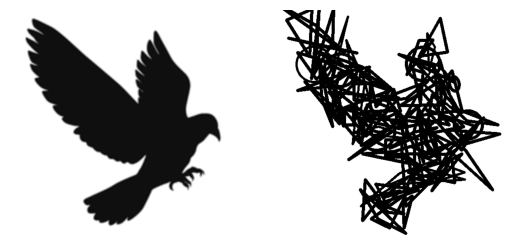

In [122]:
# 結果画像表示
target_img = (1.0 - target) * 255
target_img = target_img.astype(np.uint8)

output_img = (1.0 - canvas) * 255
output_img = output_img.astype(np.uint8)
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(target_img, cmap="gray")
a.axis("off")

a = fig.add_subplot(1, 2, 2)
# imgplot = plt.imshow(output_img, cmap="gray")
imgplot = plt.imshow(output_img, cmap="gray")
a.axis("off")
# a.set_title("Edge Art")

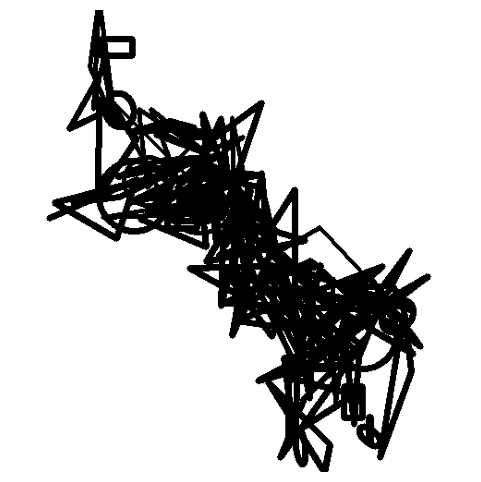

In [127]:
ims = []
fig = plt.figure(figsize=(6, 6))
for figure_id in range(0, len(records_canvas)):
    output_img = (1.0 - records_canvas[figure_id]) * 255
    output_img = output_img.astype(np.uint8)
    plt.axis("off")
    # plt.title("Edge Art")
    im = plt.imshow(output_img, cmap="gray")
    ims.append([im])
# アニメーション作成
# アニメの生成
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=50000)
# 保存
ani.save("sample.gif", writer="pillow")
# 表示
plt.show()

  0%|                                                                                            | 0/100 [00:00<?, ?it/s]/var/folders/tv/92_b1x_10nd83tbjpt4zdc2c0000gn/T/ipykernel_1170/4280542105.py:79: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(target * mask) / np.sum(target * mask)
100%|██████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.32s/it]


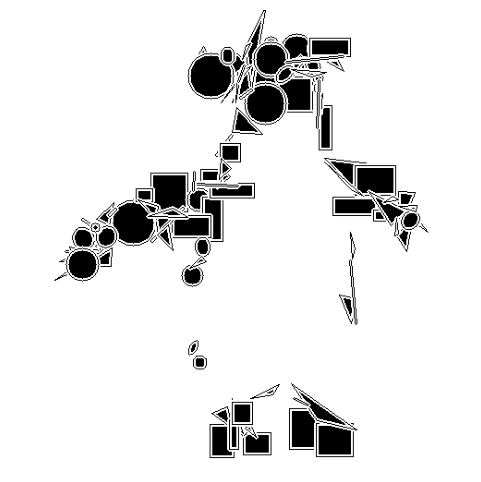

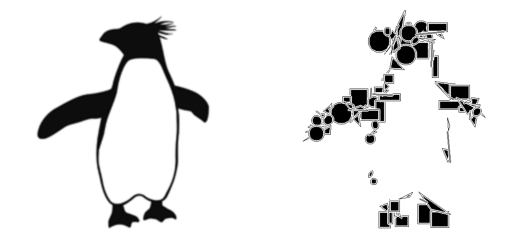

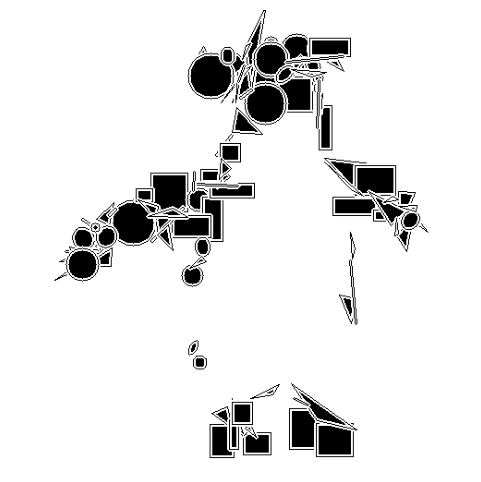

In [226]:
# 画像ファイル
filename = f"EdgeArt_sample/birdshilhouette/209.jpg"

# 一般パラメータ
image_size = 500  # 画像の縦横サイズ
figure_candidates = [
    "line",
    "circle",
    "ellipse",
    "square",
    "triangle",
]  # 図形の選択肢
num_iterations = 100  # 図形の数（試行回数）
num_candidates_per_iter = 200  # １回のテストで調べる図形の数
white_penalty = 0.9  # 白いところへの描画を抑える度合
white_penalty1 = 0.2
score_threshold = 40400  # スコア20以下は描画しない
color_candidates = [1]  # 　白か黒の色を選択
color_selected_weight = [1]
weight_line_thickness_candidates = [1]
weight_decay_line_thickness_candidates = [1]
# weight_decay_rates = [1, 0.8, 0.5, 0.3]  # 　num_iterationsごとに周線の太さを選ぶ確率を変更

# 直線パラメータ
weight_selected_line = 0.5
line_thickness_candidates = [-1]  # 周線の太さ
min_line_length = 5  # 最低縦横サイズ
max_line_length = 100  # 最高縦横サイズ

# 円パラメータ
weight_selected_circle = 0.05
circle_line_thickness_candidates = [-1]
min_circle_radius = 5  # 最低半径
max_circle_radius = 25  # 最高半径

# 楕円パラメータ
weight_selected_ellipse = 0.1
ellipse_line_thickness_candidates = [-1]
min_ellipse_radius = 5  # 横方向、縦方向の最低半径
max_ellipse_radius = 25  # 横方向、縦方向の最高半径

# 四角パラメータ
weight_selected_square = 0.1
square_line_thickness_candidates = [-1]  # 周線の太さ
min_square_size = 10  # 最低縦横サイズ
max_square_size = 50  # 最高縦横サイズ

# 三角形パラメータ
weight_selected_triangle = 0.5
triangle_line_thickness_candidates = [-1]  # 周線の太さ
min_triangle_length = 10  # 最低縦横サイズ
max_triangle_length = 50  # 最高縦横サイズ
isClosed = True

# 描画図形を選択する確率割合
weights = [
    weight_selected_line,
    weight_selected_circle,
    weight_selected_ellipse,
    weight_selected_square,
    weight_selected_triangle,
]

# 画像読み込みと前処理
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (image_size, image_size))
blurred = cv2.GaussianBlur(original, (3, 3), 0)
target = 1.0 - blurred / 255.0  # 黒=1、白=0　ぼかして白黒反転
canvas = np.zeros_like(target)

# 元画像の貢献スコアマップを事前に一度だけ計算
penalty_mask = 1 - white_penalty * (1 - target)

# 評価関数
def evaluate_figure(mask):
    overlap = target * mask - canvas * mask * 2
    white_overlap = (1 - target) * (1 - mask)
    score = np.sum(overlap * penalty_mask) + np.sum(white_overlap * white_penalty1) * (
        np.sum(target * mask) / np.sum(target * mask)
    )
    return score


# 描画間数
def draw_figure(choiced_figure):
    params_dict = {}
    params_dict["choiced_figure"] = choiced_figure

    mask = np.zeros_like(target, dtype=np.uint8)
    # 直線の描画
    if choiced_figure == "line":
        xl = random.randint(min_line_length, max_line_length)
        yl = random.randint(min_line_length, max_line_length)
        x1 = random.randint(xl, image_size - xl)
        y1 = random.randint(yl, image_size - yl)
        x2 = random.randint(x1 - xl, x1 + xl)
        y2 = random.randint(y1 - yl, y1 + yl)
        pt1 = (x1, y1)
        pt2 = (x2, y2)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            square_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        if line_thickness == -1:
            lineType = cv2.FILLED
            line_thickness = 2
        else:
            lineType = cv2.LINE_8
        cv2.line(
            mask,
            pt1=pt1,
            pt2=pt2,
            color=color,
            thickness=line_thickness,
            lineType=lineType,
        )
        params_dict["params"] = {
            "pt1": pt1,
            "pt2": pt2,
            "color": color,
            "line_thickness": line_thickness,
            "lineType": lineType,
        }
    # 円の描画
    elif choiced_figure == "circle":
        radius = random.randint(min_circle_radius, max_circle_radius)
        x = random.randint(radius, image_size - radius)
        y = random.randint(radius, image_size - radius)
        center = (x, y)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            circle_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.circle(
            mask,
            center=center,
            radius=radius,
            color=color,
            thickness=line_thickness,
        )
        params_dict["params"] = {
            "center": center,
            "radius": radius,
            "color": color,
            "line_thickness": line_thickness,
        }
    # 楕円の描画
    elif choiced_figure == "ellipse":
        xr = random.randint(min_ellipse_radius, max_ellipse_radius)
        yr = random.randint(min_ellipse_radius, max_ellipse_radius)
        x = random.randint(xr, image_size - xr)
        y = random.randint(yr, image_size - yr)
        angle = random.randint(0, 360)
        box = ((x, y), (xr, yr), angle)
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            ellipse_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.ellipse(mask, box=box, color=color, thickness=line_thickness)
        params_dict["params"] = {
            "box": box,
            "color": color,
            "line_thickness": line_thickness,
        }
    # 四角形の描画
    elif choiced_figure == "square":
        w = random.randrange(min_square_size, max_square_size, 2)
        h = random.randrange(min_square_size, max_square_size, 2)
        x = random.randint(w / 2, image_size - w / 2)
        y = random.randint(h / 2, image_size - h / 2)
        pt1 = (int(x - w / 2), int(y + h / 2))
        pt2 = (int(x + w / 2), int(y - h / 2))
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            square_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.rectangle(
            mask,
            pt1=pt1,
            pt2=pt2,
            color=color,
            thickness=line_thickness,
        )
        params_dict["params"] = {
            "pt1": pt1,
            "pt2": pt2,
            "color": color,
            "line_thickness": line_thickness,
        }
    # 三角形の描画
    elif choiced_figure == "triangle":
        possible_polt_flag = False
        while possible_polt_flag == False:
            xl = random.randint(min_triangle_length, max_triangle_length)
            yl = random.randint(min_triangle_length, max_triangle_length)
            x1 = random.randint(xl, image_size - xl)
            y1 = random.randint(yl, image_size - yl)
            x2 = random.randint(x1 - xl, x1 + xl)
            y2 = random.randint(y1 - yl, y1 + yl)
            x3 = random.randint(x2 - xl, x2 + xl)
            y3 = random.randint(y2 - yl, y2 + yl)
            if (x3 <= image_size & x3 >= 0) & (y3 <= image_size & y3 >= 0):
                possible_polt_flag = True

        pts = [np.array(((x1, y1), (x2, y2), (x3, y3)))]
        color = random.choices(color_candidates, weights=color_selected_weight)[0]
        line_thickness = random.choices(
            triangle_line_thickness_candidates,
            weights=weight_line_thickness_candidates,
        )[0]
        cv2.fillPoly(
            mask,
            pts=pts,
            color=color,
        )
        params_dict["params"] = {
            "pts": pts,
            "isClosed": isClosed,
            "color": color,
            "line_thickness": line_thickness,
        }
    else:
        print("図形の選択肢に含まれていません。")

    return mask, params_dict


# 図形の記録
records_params = []
records_scores = []
records_masks = []
records_canvas = []

# メイン処理
for _ in tqdm(range(num_iterations)):
    if _ >= 50:
        weight_line_thickness_candidates = weight_decay_line_thickness_candidates
    best_score = -np.inf
    best_params = None
    best_mask = None

    for _ in range(num_candidates_per_iter):
        # 図形の確率的選択
        choiced_figure = random.choices(figure_candidates, weights=weights)[0]
        mask, params_dict = draw_figure(choiced_figure)
        score = evaluate_figure(mask)
        if score > best_score:
            best_score = score
            best_params = params_dict
            best_mask = mask

    if (best_params != None) & (best_score >= score_threshold):
        canvas += best_mask
        contours, hierarchy = cv2.findContours(
            best_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        cv2.drawContours(canvas, contours, -1, color=0, thickness=3)
        cv2.drawContours(canvas, contours, -1, color=1, thickness=1)
        canvas = np.clip(canvas, 0, 1)
        records_params.append(best_params)
        records_scores.append(best_score)
        records_masks.append(best_mask)
        records_canvas.append(canvas)

# 結果画像表示
output_img = (1.0 - canvas) * 255
output_img = output_img.astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(output_img, cmap="gray")
plt.axis("off")
# plt.title("Edge Art")
plt.show()

# 画像保存
cv2.imwrite(f"output/test/output_bird_209.png", output_img)
# files.download("Edge_Art.png")

# CSV保存
# df = pd.DataFrame(
#     records_params, columns=["FIGURE_NAME", "X", "Y", "R", "W", "H", "LINE_THICKNESS"]
# )
# df.insert(0, "FIgure ID", range(1, len(df) + 1))
# df["Score"] = records_scores
# df.to_csv("circle_parameters.csv", index=False)
# files.download("circle_parameters.csv")

# スコア推移のグラフ表示
# plt.figure(figsize=(10, 4))
# plt.plot(
#     range(1, len(records_scores) + 1),
#     records_scores,
#     marker="o",
#     markersize=2,
#     linewidth=1,
# )
# plt.xlabel("Circle ID")
# plt.ylabel("Score")
# plt.title("Score Progression")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# 比較画像の保存
target_img = (1.0 - target) * 255
target_img = target_img.astype(np.uint8)
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(target_img, cmap="gray")
a.axis("off")
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(output_img, cmap="gray")
a.axis("off")
plt.savefig(f"output/test/output_compare_bird_209.png")

# アニメーションの保存
ims = []
fig = plt.figure(figsize=(6, 6))
for figure_id in range(0, len(records_canvas)):
    output_img = (1.0 - records_canvas[figure_id]) * 255
    output_img = output_img.astype(np.uint8)
    plt.axis("off")
    im = plt.imshow(output_img, cmap="gray")
    ims.append([im])
# アニメーション作成
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=3000)
# 保存
ani.save(f"output/test/output_animation_bird_209.gif", writer="pillow")

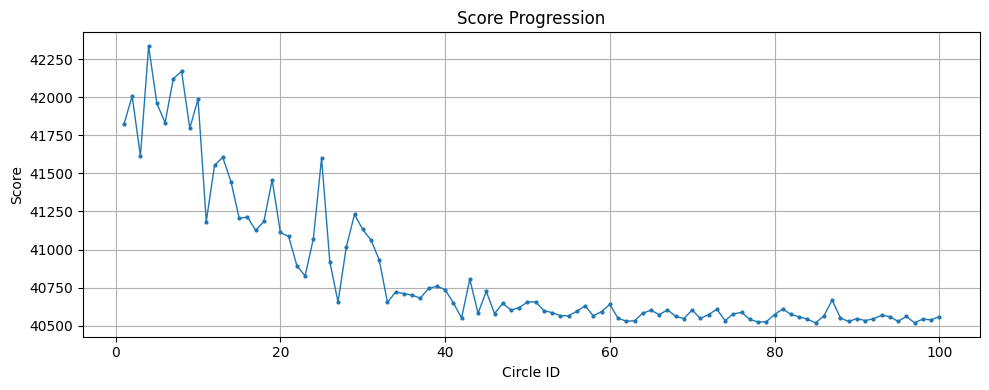

In [219]:
plt.figure(figsize=(10, 4))
plt.plot(
    range(1, len(records_scores) + 1),
    records_scores,
    marker="o",
    markersize=2,
    linewidth=1,
)
plt.xlabel("Circle ID")
plt.ylabel("Score")
plt.title("Score Progression")
plt.grid(True)
plt.tight_layout()
plt.show()